In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

In [2]:
resolution = 20  # pixels/μm

cell_size = mp.Vector3(14, 14)

#pml_layers = [mp.PML(thickness=2)]
pml_size = 1
pml_layers = [mp.PML(pml_size,direction=mp.X)]
# rotation angle (in degrees) of waveguide, counter clockwise (CCW) around z-axis
rot_angle = np.radians(0)

geometry = [
    mp.Block(
        center=mp.Vector3(),
        size=mp.Vector3(mp.inf, 14, mp.inf),
        e1=mp.Vector3(1).rotate(mp.Vector3(z=1), rot_angle),
        e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), rot_angle),
        material=mp.Medium(epsilon=12),
    )
]

fsrc = 0.15  # frequency of eigenmode or constant-amplitude source

sources = [
    mp.Source(
        src=mp.GaussianSource(fsrc, fwidth=0.2 * fsrc),
        center=mp.Vector3(),
        size=mp.Vector3(y=14),
        component=mp.Ez,
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    boundary_layers=pml_layers,
    sources=sources,
    geometry=geometry,
    k_point = mp.Vector3(1)
)

     block, center = (0,0,0)
          size (1e+20,14,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


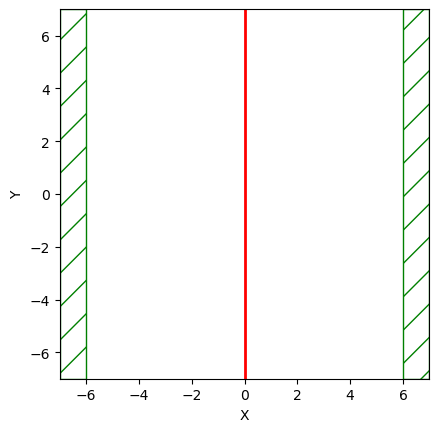

In [3]:
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [4]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(fields=mp.Ez, f=f, normalize=True)
sim.run(mp.at_every(1, animate), until_after_sources=50)
plt.close()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000315905 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,14,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.167739 s
-----------
Meep: using complex fields.


FloatProgress(value=0.0, description='0% done ', max=383.3333435058594)

     block, center = (0,0,0)
          size (1e+20,14,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Meep progress: 118.5/383.3333435058594 = 30.9% done in 4.0s, 8.9s to go
on time step 4745 (time=118.625), 0.000843048 s/step
Meep progress: 223.9/383.3333435058594 = 58.4% done in 8.0s, 5.7s to go
on time step 8960 (time=224), 0.000950079 s/step
Meep progress: 338.15000000000003/383.3333435058594 = 88.2% done in 12.0s, 1.6s to go
on time step 13536 (time=338.4), 0.000874266 s/step
Normalizing field data...
run 0 finished at t = 383.35 (15334 timesteps)


In [9]:
filename = "oblique-source-normal.mp4"
animate.to_mp4(10, filename)
Video(filename)

Generating MP4...


In [13]:
kx = 0.4  # initial guess for wavevector in x-direction of eigenmode
kpoint = mp.Vector3(kx).rotate(
    mp.Vector3(z=1), rot_angle
)  # Rotate the vector by the specified amount

bnum = 1  # band number of eigenmode

sources = [
    mp.EigenModeSource(
        src=mp.GaussianSource(fsrc, fwidth=0.2 * fsrc),
        center=mp.Vector3(),
        size=mp.Vector3(y=14),
        direction=mp.NO_DIRECTION,
        eig_kpoint=kpoint,
        eig_band=bnum,
        eig_parity=mp.EVEN_Y + mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
        eig_match_freq=True,
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    boundary_layers=pml_layers,
    sources=sources,
    geometry=geometry,
    symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [],
    k_point = mp.Vector3(1)
)

In [14]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(fields=mp.Ez, f=f, normalize=True)
sim.run(mp.at_every(1, animate), until_after_sources=50)
plt.close()

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000946999 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,14,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.07758 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.4,0,0) = 0.11547 after 28 iters
MPB solved for frequency_1(0.519615,0,0) = 0.15 after 1 iters


FloatProgress(value=0.0, description='0% done ', max=383.3333435058594)

     block, center = (0,0,0)
          size (1e+20,14,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Meep progress: 185.0/383.3333435058594 = 48.3% done in 4.0s, 4.3s to go
on time step 7406 (time=185.15), 0.000540131 s/step
Meep progress: 377.0/383.3333435058594 = 98.3% done in 8.0s, 0.1s to go
on time step 15080 (time=377), 0.00052203 s/step
Normalizing field data...
run 0 finished at t = 383.35 (15334 timesteps)


In [15]:
filename = "oblique-source-eig.mp4"
animate.to_mp4(10, filename)
Video(filename)

Generating MP4...
